In [ ]:
# Random Forest Algorithm

# Objective: Build a Random Forest model to predict the loan status (Loan_Status) in the test dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv("./csv/loan_data.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
cat_columns = data.select_dtypes(include=["object", "category"]).columns.tolist()
num_columns = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

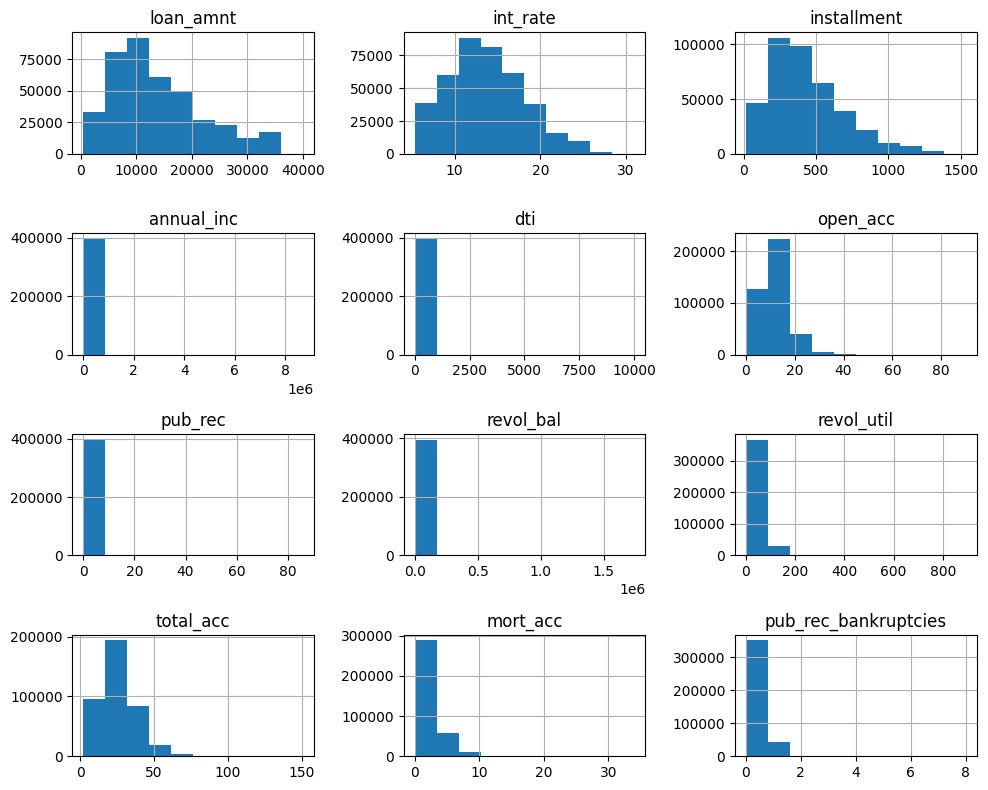

In [ ]:
data[num_columns].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
cat_columns.__len__()

15

In [ ]:
num_columns.__len__()

12

In [ ]:
# Categorical Features Distribution
# for feature in cat_columns:
#     sns.countplot(x=feature, data=data)
#     plt.title(f"{feature} Distribution")
#     plt.show()

In [ ]:
#  Loan_Status vs Categorical Features

# for feature in cat_columns:
#     sns.countplot(x=feature, hue="loan_status", data=data)
#     plt.title(f"Loan_Status vs {feature}")
#     plt.show()

In [ ]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
# Fill missing values in numerical columns with the median
for col in num_columns:
    data[col].fillna(data[col].median(), inplace=True)
# Fill missing values in categorical columns with the mode
for col in cat_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
grade_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
data["grade"] = data["grade"].map(grade_mapping)

In [ ]:
data["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
data["sub_grade"] = data["sub_grade"].apply(lambda x: int(x[1]))

In [ ]:
# .apply(lambda x: int(x[1])): The apply() function applies a given operation (in this case, a lambda function) to each element of the sub_grade column.

# lambda x: int(x[1]): This lambda function takes each value x in the sub_grade column, extracts the second character (x[1]), and converts it into an integer using the int() function.
# Example: If x is the string 'B2', x[1] will be '2', and int(x[1]) will convert it to the integer 2.

In [ ]:
data["loan_status"].replace({"N": 0, "Y": 1}, inplace=True)

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,2,4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,2,5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,2,3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,1,2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,3,5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
"loan_status" in data.columns

True

In [ ]:
new_cat_columns = data.select_dtypes(include=["object", "category"]).columns.tolist()

In [ ]:
new_cat_columns

['term',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [ ]:
for col in new_cat_columns:
    if data[col].nunique() == 2:
        print(data[col].name)

term
loan_status
initial_list_status


In [ ]:
# One-Hot Encoding for Nominal Variables
nominal_columns = [
    "term",
    "home_ownership",
    "verification_status",
    "purpose",
    "initial_list_status",
    "application_type",
]

data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [ ]:
# Convert 'issue_d' to datetime and extract useful features
data["issue_d"] = pd.to_datetime(data["issue_d"], format="%b-%Y")
data["issue_year"] = data["issue_d"].dt.year
data["issue_month"] = data["issue_d"].dt.month
data.drop("issue_d", axis=1, inplace=True)

In [ ]:
# Convert 'earliest_cr_line' to datetime and extract useful features
data["earliest_cr_line"] = pd.to_datetime(data["earliest_cr_line"], format="%b-%Y")
data["earliest_cr_line_year"] = data["earliest_cr_line"].dt.year
data.drop("earliest_cr_line", axis=1, inplace=True)

In [ ]:
new_new_cat_columns = data.select_dtypes(
    include=["object", "category"]
).columns.tolist()

cat_data = data[new_new_cat_columns]

cat_data.head()

,emp_title,emp_length,loan_status,title,address
0,Marketing,10+ years,Fully Paid,Vacation,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,4 years,Fully Paid,Debt consolidation,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,< 1 year,Fully Paid,Credit card refinancing,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,6 years,Fully Paid,Credit card refinancing,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,9 years,Charged Off,Credit Card Refinance,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
# Calculate the mean of annual_inc, ignoring zero values
mean_annual_inc = data.loc[data["annual_inc"] != 0, "annual_inc"].mean()
# Replace zero annual_inc with the mean annual_inc
data["annual_inc"] = data["annual_inc"].replace(0, mean_annual_inc)
# Calculate income_loan_ratio
data["income_loan_ratio"] = data["loan_amnt"] / data["annual_inc"]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   grade                                396030 non-null  int64  
 4   sub_grade                            396030 non-null  int64  
 5   emp_title                            396030 non-null  object 
 6   emp_length                           396030 non-null  object 
 7   annual_inc                           396030 non-null  float64
 8   loan_status                          396030 non-null  object 
 9   title                                396030 non-null  object 
 10  dti                                  396030 non-null  float64
 11  open_acc     

In [ ]:
new_new_cat_columns.head()

AttributeError: 'list' object has no attribute 'head'

In [ ]:
cat_data.head()

,emp_title,emp_length,loan_status,title,address
0,Marketing,10+ years,Fully Paid,Vacation,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,4 years,Fully Paid,Debt consolidation,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,< 1 year,Fully Paid,Credit card refinancing,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,6 years,Fully Paid,Credit card refinancing,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,9 years,Charged Off,Credit Card Refinance,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
new_new_cat_columns.remove("loan_status")

In [ ]:
cat_data = data[new_new_cat_columns]

In [ ]:
cat_data.head()

,emp_title,emp_length,title,address
0,Marketing,10+ years,Vacation,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,4 years,Debt consolidation,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,< 1 year,Credit card refinancing,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,6 years,Credit card refinancing,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,9 years,Credit Card Refinance,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
le = LabelEncoder()
# Applying label encoding to each of the categorical columns
for col in new_new_cat_columns:
    data[col] = le.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   grade                                396030 non-null  int64  
 4   sub_grade                            396030 non-null  int64  
 5   emp_title                            396030 non-null  int32  
 6   emp_length                           396030 non-null  int32  
 7   annual_inc                           396030 non-null  float64
 8   loan_status                          396030 non-null  object 
 9   title                                396030 non-null  int32  
 10  dti                                  396030 non-null  float64
 11  open_acc     

In [ ]:
# everything except the loan status is numerical

In [ ]:
# Correlation Clustering:

import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering on the correlation matrix
corr_matrix = data.corr()
corr_linkage = sch.linkage(sch.distance.pdist(corr_matrix), method="complete")
# Plot the dendrogram to visualize clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(corr_linkage, labels=corr_matrix.columns, leaf_rotation=90)
plt.title("Feature Clustering Dendrogram")
plt.show()
# You can then manually select features from each cluster

ValueError: could not convert string to float: 'Fully Paid'

In [ ]:
# We don't want this "Correlation Cluster". It's weird that we need numerical but pdf ma j pani chalcha

In [ ]:
data.drop(columns=["emp_title", "emp_length", "title", "address"], inplace=True)

In [ ]:
# Check for infinite values
print(data.isin([np.inf, -np.inf]).sum())

loan_amnt                              0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
annual_inc                             0
loan_status                            0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
mort_acc                               0
pub_rec_bankruptcies                   0
term_ 60 months                        0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_credit_card                    0
purpose_debt_con

In [ ]:
y = data["loan_status"]
X = data.drop(["loan_status"], axis=1)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)

In [ ]:
# Sort the importances in descending order and select the top 10 features
top_10_importances = importances.sort_values(ascending=False).head(10)

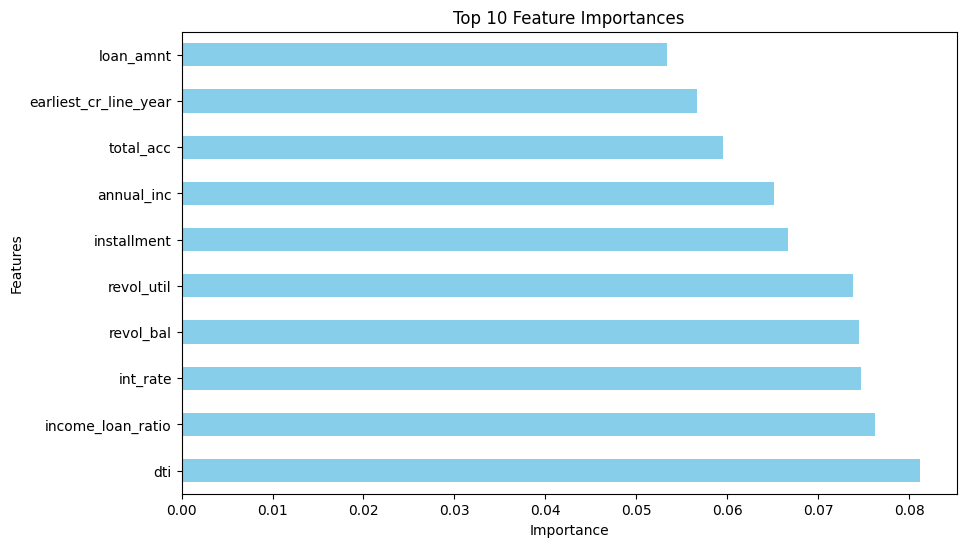

In [ ]:
# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
top_10_importances.plot(kind="barh", color="skyblue")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
# Display the top 10 feature importances
print(top_10_importances)

dti                      0.081124
income_loan_ratio        0.076196
int_rate                 0.074690
revol_bal                0.074499
revol_util               0.073837
installment              0.066670
annual_inc               0.065163
total_acc                0.059488
earliest_cr_line_year    0.056665
loan_amnt                0.053313
dtype: float64


In [ ]:
data["loan_status"].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [ ]:
# SMOTE is a technique that generates synthetic samples for the minority class to balance the dataset.
sm = SMOTE(random_state=42)

# It resamples the dataset, generating new synthetic samples for the minority class here it's "Charged off"
X_res, y_res = sm.fit_resample(X, y)
# Check the new class distribution
print(pd.Series(y_res).value_counts())

loan_status
Fully Paid     318357
Charged Off    318357
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target labels for the test set
y_pred = rf_model.predict(X_test)

In [ ]:
param_grid = {
    "n_estimators": [100, 200],  # Fewer options
    "max_depth": [6, None],  # Fewer depths to explore
    "max_features": ["sqrt"],  # Use just 'sqrt'
    "min_samples_split": [2, 5],  # Fewer split points
    "bootstrap": [True],  # Only one option for bootstrap
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=8,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [ ]:
# RandomizedSearchCV is a method that performs randomized hyperparameter tuning. It searches over a subset of possible parameter values and selects the best combination based on performance. It’s more efficient than GridSearchCV, which exhaustively checks all parameter combinations.
# This specifies the number of iterations to run, meaning RandomizedSearchCV will try 8 random combinations of parameters from param_grid
# Cross-validation strategy: 3-fold cross-validation is used. The data will be split into 3 parts, and the model will be trained and evaluated 3 times, each time using a different part for validation and the remaining parts for training.
# scoring="roc_auc": This specifies the scoring metric used to evaluate the model's performance. "roc_auc" stands for the Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a commonly used metric for classification problems, especially when dealing with imbalanced data.

# why not scoring = "accuracy"
# In imbalanced classification problems, ROC AUC (or other metrics like F1-score, precision, recall) is often preferred over accuracy because it gives a better sense of how well the model handles both the majority and minority classes. Accuracy may lead to overly optimistic results in such cases and doesn't capture the full picture of model performance.
# Example: If 95% of your data belongs to Class A and only 5% to Class B, a model that predicts Class A all the time would have 95% accuracy, but it would be completely useless in detecting Class B.

In [ ]:
# Training the Model with Best Parameters
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)
RandomForestClassifier(n_estimators=200, random_state=42)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Split the data into train, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

# Predict on the validation set
y_pred = best_rf.predict(X_valid)
y_proba = best_rf.predict_proba(X_valid)[:, 1]  # Probabilities for ROC AUC

# the [:, 1] part is used to select the probabilities of the positive class from the predicted probabilities returned by the predict_proba method.
# predict_proba(X_valid), the Random Forest model returns a 2D array (or DataFrame) where each row corresponds to a sample in the input data (X_valid), and each column corresponds to a class label.

# The first column (index 0) contains the predicted probabilities of the negative class (e.g., loan_status = 0).
# The second column (index 1) contains the predicted probabilities of the positive class (e.g., loan_status = 1).

print(classification_report(y_valid, y_pred))
print("y probability", y_proba)

              precision    recall  f1-score   support

 Charged Off       0.94      0.80      0.86     63700
  Fully Paid       0.82      0.95      0.88     63643

    accuracy                           0.87    127343
   macro avg       0.88      0.88      0.87    127343
weighted avg       0.88      0.87      0.87    127343

y probability [0.95  0.86  0.825 ... 0.905 0.91  0.79 ]


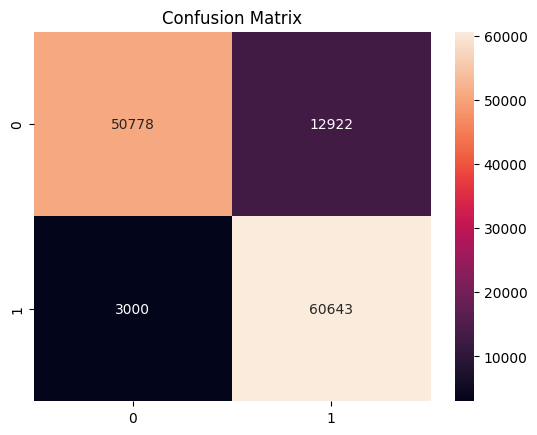

In [ ]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cv_scores = cross_val_score(best_rf, X_res, y_res, cv=5, scoring="roc_auc")
print("Cross-Validation AUC Scores:", cv_scores)
print("Mean CV AUC Score:", cv_scores.mean())

Cross-Validation AUC Scores: [0.72263759 0.94064607 0.99707536 0.99692849 0.99720864]
Mean CV AUC Score: 0.930899228100577


In [ ]:
# cross_val_score Function: This function is used to evaluate a model's performance using cross-validation.
# print("Cross-Validation AUC Scores:", cv_scores): This line prints the array of ROC AUC scores obtained from each of the 5 cross-validation folds. Each score represents the model's performance on one of the validation folds.
# print("Mean CV AUC Score:", cv_scores.mean()): This line calculates and prints the mean ROC AUC score across all 5 folds, providing a single summary metric that indicates the overall performance of the model.